<center><h1>Mini Project 1</h1></center>
<br>
<center><font size="5">Name - Spandan Patil</font></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [377]:
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Get the Vertebral Column Data Set

In [378]:

# Reading the column2C .arff file
with open('../data/vertebral_column_data/column_2C_weka.arff') as d:
    data1 = arff.load(d)


# Converting the file to the dataframe, with columns as the attributes present in .arff file.
df = pd.DataFrame(data1['data'], columns=[attr[0] for attr in data1['attributes']])


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [380]:
df["class"].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [381]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

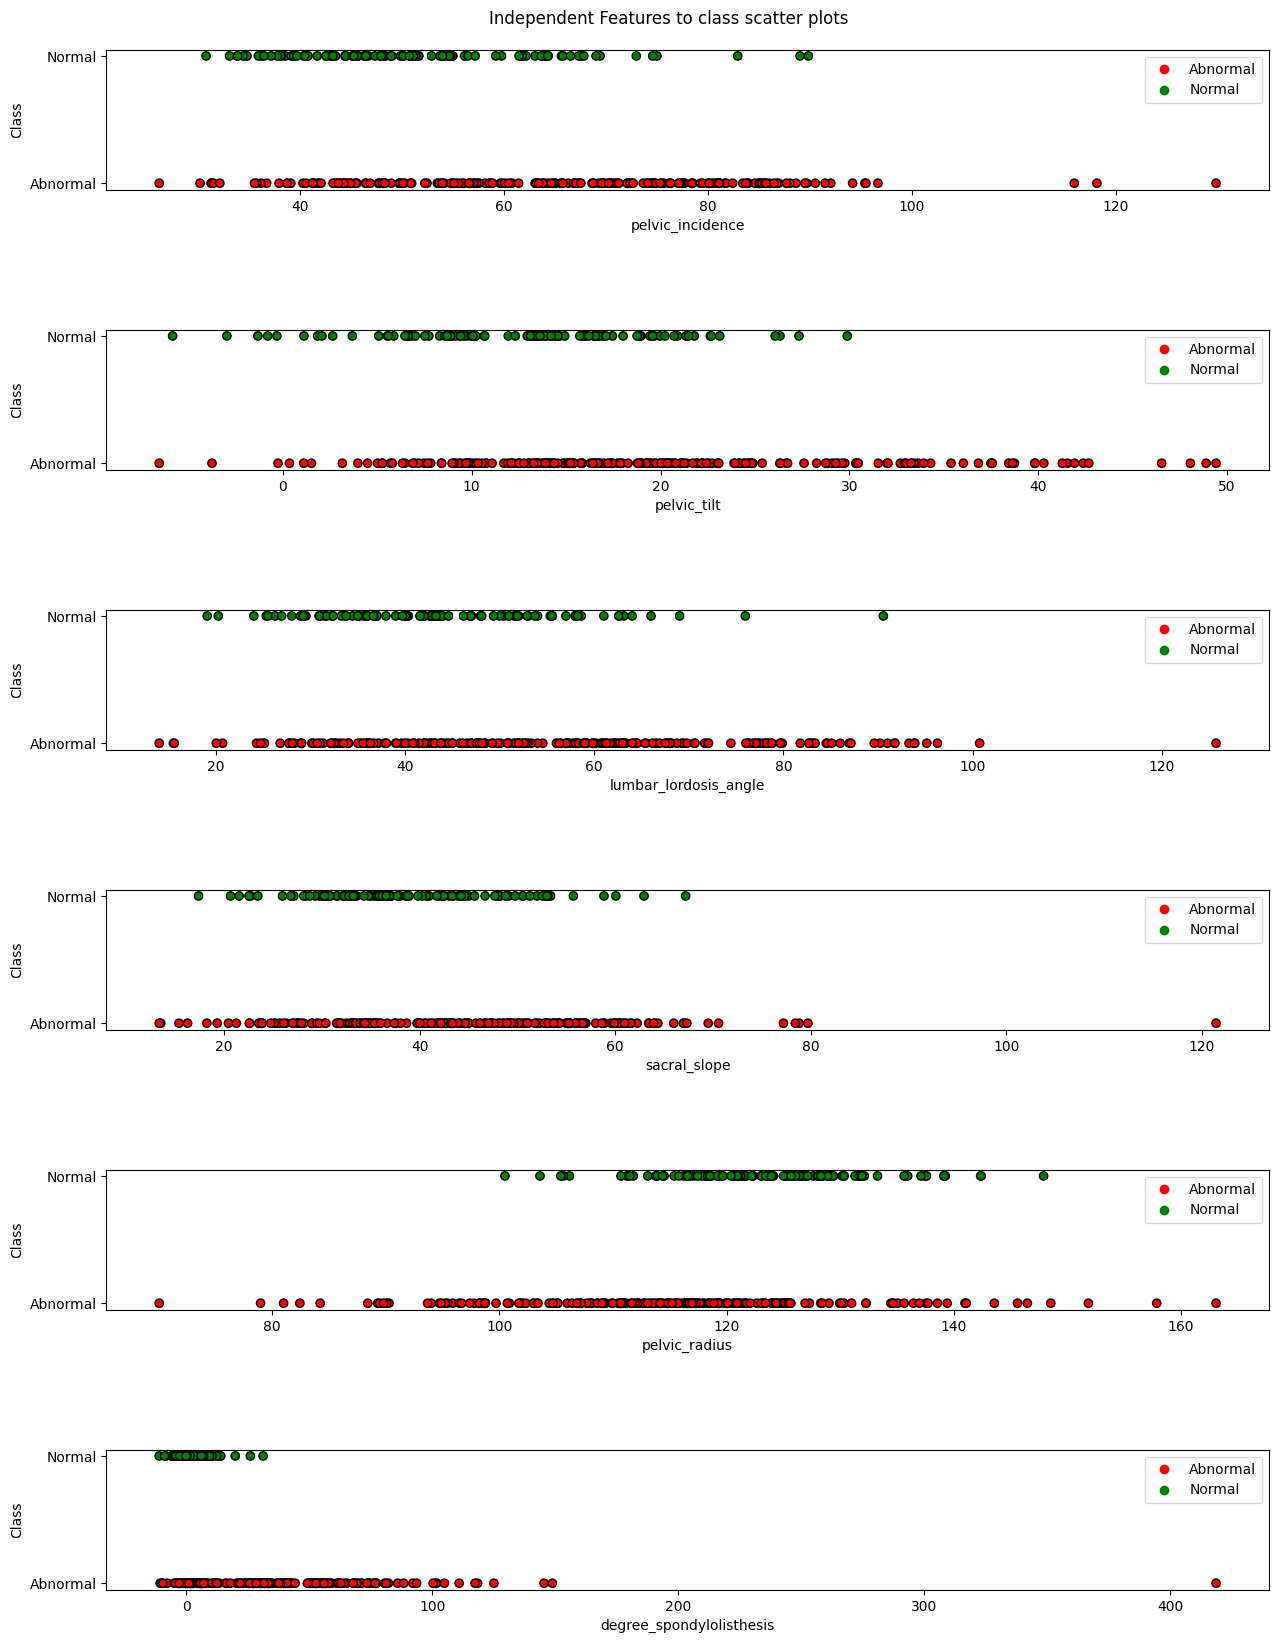

In [382]:
# Getting the list of all the columns except for class
cols = df.columns[:-1]

# Creating subplots for each of the independent feature to class scatter plot
fig, axes = plt.subplots(len(cols), figsize=(15, 20))

fig.suptitle("Independent Features to class scatter plots", y=0.9)

# Creating a Color Mapping for the abnormal and normal class
colors_map = {'Abnormal': 'red', 'Normal': 'green'}

# Create a list which will indicate which color to assign for the row in the column
class_color_list = [colors_map[c] for c in df["class"]]

# Creating a empty scatter to assign correct classes color in the legend
legend_handles = [plt.scatter([], [], color=color, label=c) for c, color in colors_map.items()]

# Iterating through all the independent features and creating a scatter plot for them.
for index in range(len(cols)):
    axes[index].scatter(df[cols[index]], df["class"], c=class_color_list, edgecolors="black")
    axes[index].set_xlabel(cols[index])
    axes[index].set_ylabel("Class")
    axes[index].legend(handles=legend_handles)

plt.subplots_adjust(hspace=1)

plt.show()


        

#### ii. Boxplots

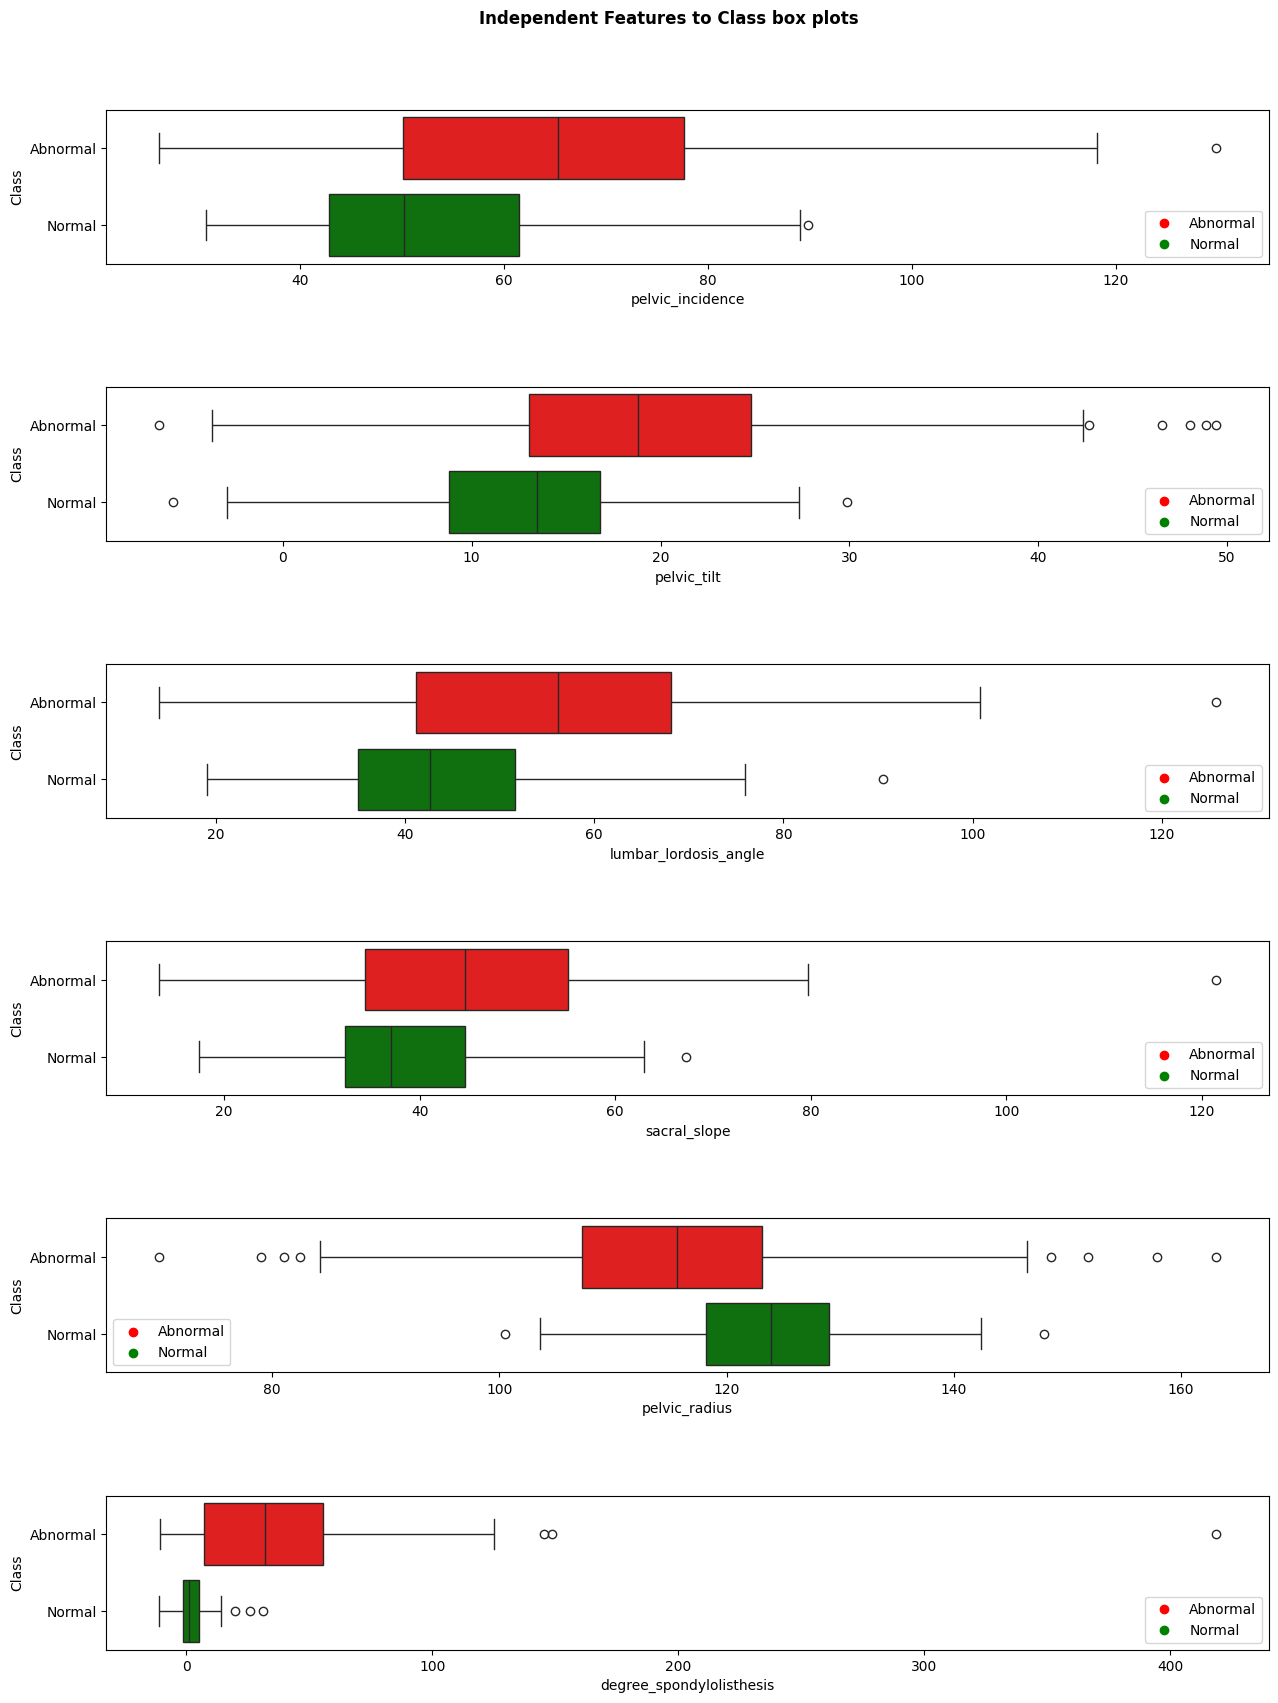

In [383]:
# Getting the list of all the columns except for class
cols = df.columns[:-1]

# Creating subplots for each of the independent feature to class box plot
fig, axes = plt.subplots(len(cols), figsize=(15, 20))

fig.suptitle("Independent Features to Class box plots", y=0.93, fontweight='bold')

# Creating a Color Mapping for the abnormal and normal class
colors_map = {'Abnormal': 'red', 'Normal': 'green'}

# Creating a empty scatter plot to assign correct classes color in the legend
legend_handles = [plt.scatter([], [], color=color, label=c) for c, color in colors_map.items()]

# Iterating through all the independent features and creating a box plot for them.
for index in range(len(cols)):
    sns.boxplot(x=cols[index], y="class", data=df, hue="class", palette=colors_map, ax=axes[index])
    axes[index].set_xlabel(cols[index])
    axes[index].set_ylabel("Class")
    axes[index].legend(handles=legend_handles)

plt.subplots_adjust(hspace=0.8)

plt.show()

#### iii. Split Data Set

In [384]:
# Creating a df having all the rows which are of Normal class
n_class = df[df["class"] == "Normal"]
# Creating a df having all the rows which are of Abnormal class
a_class = df[df["class"] == "Abnormal"]

# Create a new column binary_label, which we will use as our output class in Knn Classifier.
n_class["binary_label"] = n_class["class"].apply(lambda c: 0 if c == "Normal" else 1)
a_class["binary_label"] = a_class["class"].apply(lambda c: 0 if c == "Normal" else 1)

# Deleting the class column from the dataset to remove duplicate column.
del n_class["class"]
del a_class["class"]

# For the training set taking the first 70 rows of the normal class rows and first 140 rows of the abnormal class rows.
train_set = pd.concat([n_class[:70], a_class[:140]], axis=0)
# For the training set taking the remaining 30 rows of the normal class rows and remaining 70 rows of the abnormal class rows.
test_set = pd.concat([n_class[70:], a_class[140:]], axis=0)

# Setting the random state as 34 and shuffling the train_set and test_set rows.
r_state = 34
train_set = train_set.sample(frac=1, random_state=r_state).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=r_state).reset_index(drop=True)

# Separating the training input and output features
train_X = train_set[train_set.columns[:-1]]
train_y = train_set[train_set.columns[-1]]

# Separating the testing input and output features
test_x = test_set[test_set.columns[:-1]]
test_y = test_set[test_set.columns[-1]]

In [385]:
train_set.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,binary_label
0,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,1
1,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,1
2,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020,1
3,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203,0
4,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,1


### (c) Classification

#### i. Euclidean Metric

I am directly using the sklearn input metric parameter to give euclidean and other distance metric as parameters to the Knn Classifier model.

#### ii. Test Data

In [386]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(208, 0, -3)]

# A dataframe to store the train and test errors for each of the k values.
train_test_errs = pd.DataFrame(columns=["k_value", "train_err", "test_err"])

# Variables to store the Optimal k value and its train_set predictions and test_set predictions
opt_k = None
opt_k_train_y_pred = None
opt_k_test_y_pred = None

# Variable to store the current minimum test error seen
min_err = float("inf")

for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as euclidean, which is same as minkowski metric with p = 2, according the sklearn documentation.
    knn = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=2)
    knn.fit(train_X, train_y)
    
    train_y_pred = knn.predict(train_X)
    test_y_pred = knn.predict(test_x)

    # Calculating the training and testing errors by subtracting the accuracy scores obtained from 1.
    train_err = 1 - accuracy_score(train_y, train_y_pred)
    test_err = 1 - accuracy_score(test_y, test_y_pred)

    # Create a new row for the train_test_errs dataframe and concatinating it.
    newRow = pd.DataFrame([{"k_value": k, "train_err": train_err, "test_err": test_err}])
    train_test_errs = pd.concat([train_test_errs, newRow], ignore_index=True)

    # If we have found a smaller test error then update the optimal k value and its respective test_err, train predictions and test predicitions.
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_train_y_pred = train_y_pred
        opt_k_test_y_pred = test_y_pred
    

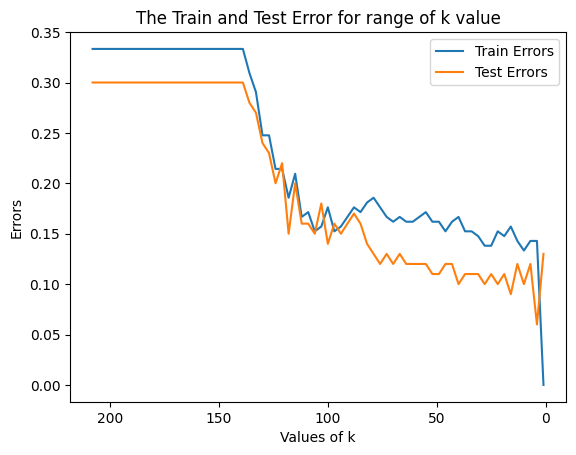

In [387]:
# Plotting the Train and Test errors graph with respect to the different values of k (208, 205, ... , 1) in descending order.
plt.title("The Train and Test Error for range of k value")
plt.plot(train_test_errs["k_value"], train_test_errs["train_err"], label="Train Errors")
plt.plot(train_test_errs["k_value"], train_test_errs["test_err"], label="Test Errors")
# Inverting the x axis so that we have maximum value of k at the left side and minimum value of k at the right.
plt.gca().invert_xaxis()
plt.xlabel("Values of k")
plt.ylabel("Errors")
plt.legend()
plt.show()


The optimal value of k is 4 with error as 0.06


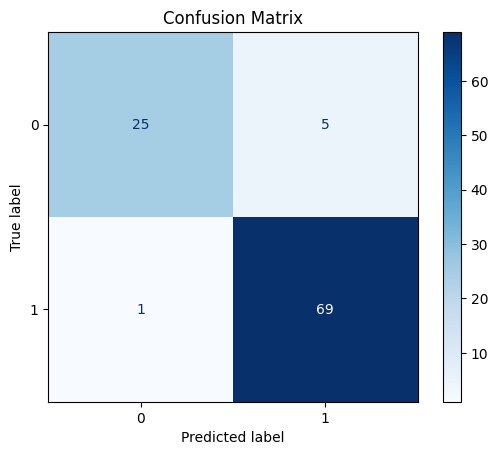

The True positive rate for k = 4 is : 0.99
The True negative rate for k = 4 is : 0.83
The Precision for k = 4 is : 0.93
The F1_Score for k = 4 is : 0.96


In [388]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

# Plotting the confusion matrix for the best value of k
conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The Precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

#### iii. Learning Curve

In [389]:
# List of all the sizes of training set for which we are going to test out Knn Classifier.
n_values = [n for n in range(10, 211, 10)]

# List to store all the best test errors we have obtained for some values of k for that particular size of training set.
best_test_errs = []

for n in n_values:
    # Taking the first n/3 rows of normal class and n - (n/3) rows of the abnormal class as our training set.
    temp_train_set = pd.concat([n_class[:n//3], a_class[:(n - (n//3))]], axis=0)
    # Spliting the training set into input and output features.
    temp_train_X = temp_train_set[temp_train_set.columns[:-1]]
    temp_train_y = temp_train_set[temp_train_set.columns[-1]]

    # Variable to store the minimum test error we have found for this particular size of training set.
    min_err = float("inf")

    # List of all the k values we are going to consider.
    k_val = [k for k in range(1, n, 5)]
    for k in k_val:
        # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as euclidean
        knn = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=2)
        knn.fit(temp_train_X, temp_train_y)
        test_y_pred = knn.predict(test_x)
        test_err = 1 - accuracy_score(test_y, test_y_pred)
        if min_err > test_err or (min_err >= test_err and opt_k == 1):
            min_err = test_err
    # Adding the best test error we have found to the list.
    best_test_errs.append(min_err)

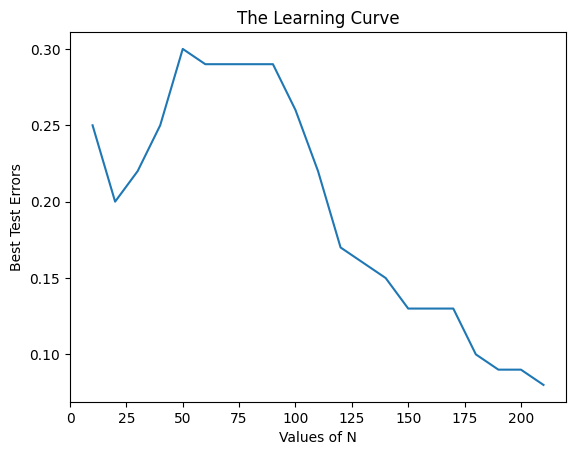

In [390]:
# Plotting the Learning Curve we have obtained.
plt.title("The Learning Curve")
plt.plot(n_values, best_test_errs)
plt.xlabel("Values of N")
plt.ylabel("Best Test Errors")
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [391]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error we have found
min_err = float("inf")
# Variable to store the test set prediction made for the optimal value of k.
opt_k_test_y_pred = None
for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as Manhattan, which is same as minkowski metric with p = 1, according the sklearn documentation.
    knn = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=1)
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred
    

The optimal value of k is 6 with error as 0.11


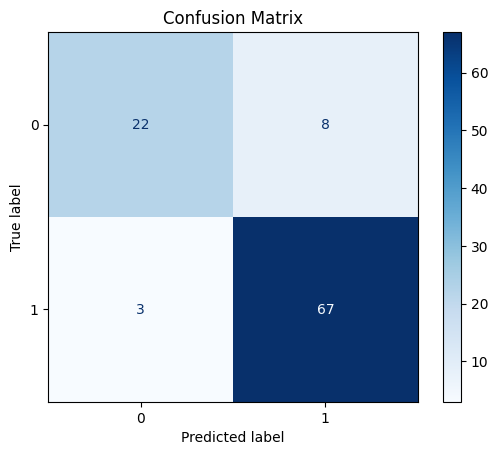

The True positive rate for k = 6 is : 0.96
The True negative rate for k = 6 is : 0.73
The precision for k = 6 is : 0.89
The F1_Score for k = 6 is : 0.92


In [392]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [393]:
# Creating a list of all the log10(p) values we will be considering for out Knn classifier.
p_values = np.arange(0.1, 1.1, 0.1)

# Variable to store the optimal value of p.
opt_p = None

# Variable to store the best test error we have found.
min_err = float("inf")

# Variable to store the test set prediction for the optimal p value.
opt_p_test_y_pred = None
for p in p_values:
    # Creating a Knn Classifer object with number of neighbors to consider as optimal value of k which we had found for the manhattan distance metric.
    knn = KNeighborsClassifier(n_neighbors=opt_k,  metric='minkowski', p=p)
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err:
        opt_p = p
        min_err = test_err
        opt_p_test_y_pred = test_y_pred

The optimal value of log base 10 of p is 0.9 with error as 0.11


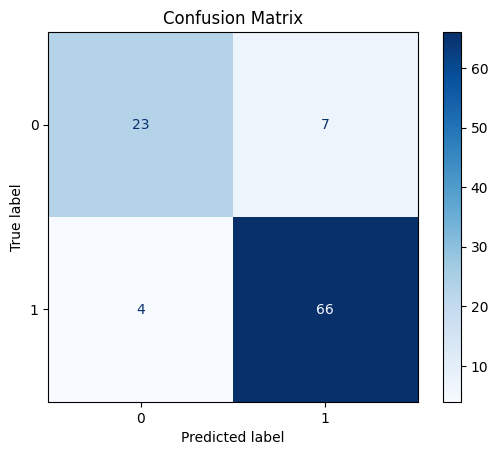

The True positive rate for log base 10 of p = 0.9 is : 0.94
The True negative rate for log base 10 of p = 0.9 is : 0.77
The Precision for log base 10 of p = 0.9 is : 0.90
The F1_Score for log base 10 of p = 0.9 is : 0.92


In [394]:
print(f"The optimal value of log base 10 of p is {opt_p} with error as {min_err:.2f}")

opt_p_confusion_matrix = confusion_matrix(test_y, opt_p_test_y_pred)
opt_p_true_positive_rate = recall_score(test_y, opt_p_test_y_pred)
opt_p_true_negative_rate = recall_score(test_y, opt_p_test_y_pred, pos_label=0)
opt_p_precision = precision_score(test_y, opt_p_test_y_pred)
opt_p_f1_score = f1_score(test_y, opt_p_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_p_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for log base 10 of p = {opt_p} is : {opt_p_true_positive_rate:.2f}")
print(f"The True negative rate for log base 10 of p = {opt_p} is : {opt_p_true_negative_rate:.2f}")
print(f"The Precision for log base 10 of p = {opt_p} is : {opt_p_precision:.2f}")
print(f"The F1_Score for log base 10 of p = {opt_p} is : {opt_p_f1_score:.2f}")

##### C. Chebyshev Distance With p -> infinity.

In [395]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error
min_err = float("inf")
# Variable to store the test set predictions for the optimal value of k.
opt_k_test_y_pred = None

for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as Chebyshev, which is same as minkowski metric with p = infinity, according the sklearn documentation.
    knn = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=float("inf"))
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred
    

The optimal value of k is 16 with error as 0.08


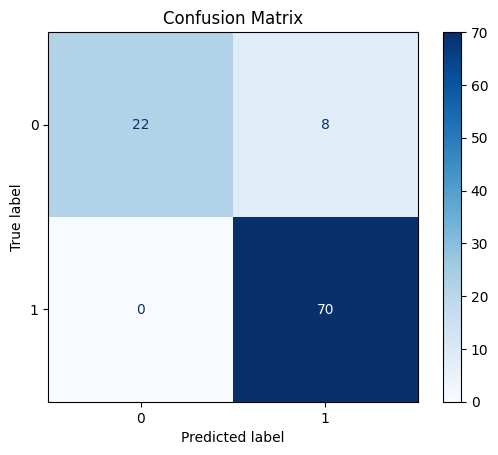

The True positive rate for k = 16 is : 1.00
The True negative rate for k = 16 is : 0.73
The precision for k = 16 is : 0.90
The F1_Score for k = 16 is : 0.95


In [396]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

#### ii. Mahalanobis Distance.

In [397]:
# Creating a Standard Scaler object to standard scale our input features.
standaradScaler = StandardScaler()

# Scaling the training input features.
scaled_train_X = standaradScaler.fit_transform(train_X)

# Scaling the testing input features.
scaled_test_x = standaradScaler.transform(test_x)

# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error we have obtained.
min_err = float("inf")

# Variable to store the test predictions for the optimal k.
opt_k_test_y_pred = None
for k in k_val:
     # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as mahalanobis, for this metric we need to standard scale our input feature and give the inverted covariance matrix of the scaled input features.
    knn = KNeighborsClassifier(n_neighbors=k,  metric='mahalanobis', metric_params={'VI': np.cov(scaled_train_X.T)})
    knn.fit(scaled_train_X, train_y)
    
    test_y_pred = knn.predict(scaled_test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred
    

The optimal value of k is 6 with error as 0.13


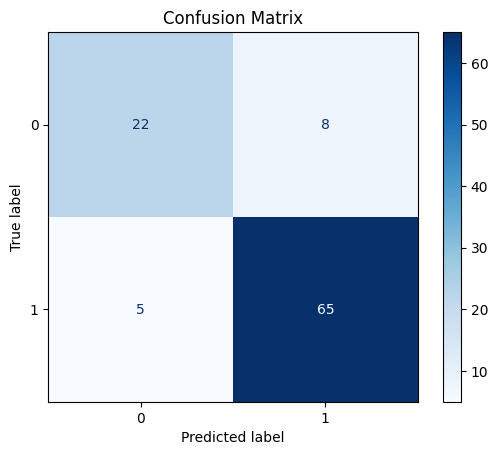

The True positive rate for k = 6 is : 0.93
The True negative rate for k = 6 is : 0.73
The precision for k = 6 is : 0.89
The F1_Score for k = 6 is : 0.91


In [398]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

### (e) Weighted Decision

#### i. Euclidean Metric

In [399]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error we have obtained.
min_err = float("inf")
# Variable to store the test predictions for the optimal k.
opt_k_test_y_pred = None

for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as euclidean, which is same as minkowski metric with p = 2, according the sklearn documentation. Also instead of uniform weights, we are using the weighted metric in which the closer the neighbor is to our query point, the more weight it will have in the classification.
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric='minkowski', p=2)
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred

The optimal value of k is 6 with error as 0.10


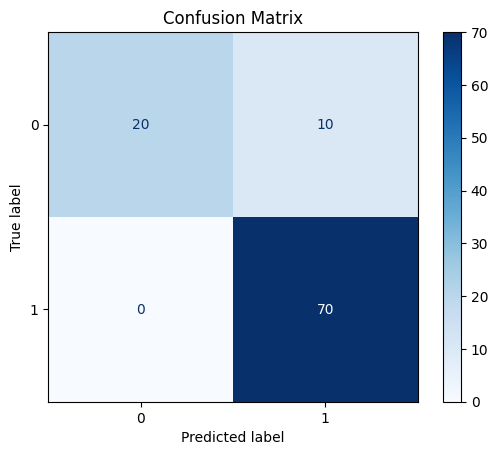

The True positive rate for k = 6 is : 1.00
The True negative rate for k = 6 is : 0.67
The precision for k = 6 is : 0.88
The F1_Score for k = 6 is : 0.93


In [400]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

#### ii. Manhattan Distance

In [401]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error we have obtained.
min_err = float("inf")
# Variable to store the test predictions for the optimal k.
for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as manhattan, which is same as minkowski metric with p = 1, according the sklearn documentation. Also instead of uniform weights, we are using the weighted metric in which the closer the neighbor is to our query point, the more weight it will have in the classification.
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric='minkowski', p=1)
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred

The optimal value of k is 26 with error as 0.10


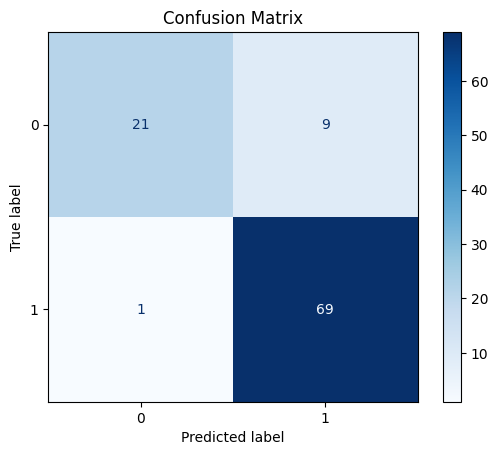

The True positive rate for k = 26 is : 0.99
The True negative rate for k = 26 is : 0.70
The precision for k = 26 is : 0.88
The F1_Score for k = 26 is : 0.93


In [402]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

#### iii. Chebyshev Distance

In [403]:
# List of all the k values for which we are going to test out Knn Classifier.
k_val = [k for k in range(1, 200, 5)]

# Variable to store the optimal value of k.
opt_k = None
# Variable to store the minimum test error we have obtained.
min_err = float("inf")
# Variable to store the test predictions for the optimal k.
for k in k_val:
    # Creating a Knn Classifer object with number of neighbors to consider as k and distance metrics as chebyshev, which is same as minkowski metric with p = infinity, according the sklearn documentation. Also instead of uniform weights, we are using the weighted metric in which the closer the neighbor is to our query point, the more weight it will have in the classification.
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric='minkowski', p=float("inf"))
    knn.fit(train_X, train_y)
    
    test_y_pred = knn.predict(test_x)

    test_err = 1 - accuracy_score(test_y, test_y_pred)
    if min_err > test_err or (min_err >= test_err and opt_k == 1):
        opt_k = k
        min_err = test_err
        opt_k_test_y_pred = test_y_pred

The optimal value of k is 16 with error as 0.11


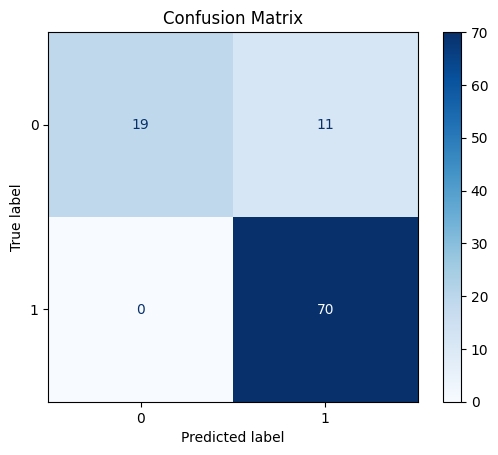

The True positive rate for k = 16 is : 1.00
The True negative rate for k = 16 is : 0.63
The precision for k = 16 is : 0.86
The F1_Score for k = 16 is : 0.93


In [404]:
print(f"The optimal value of k is {opt_k} with error as {min_err:.2f}")

opt_k_confusion_matrix = confusion_matrix(test_y, opt_k_test_y_pred)
opt_k_true_positive_rate = recall_score(test_y, opt_k_test_y_pred)
opt_k_true_negative_rate = recall_score(test_y, opt_k_test_y_pred, pos_label=0)
opt_k_precision = precision_score(test_y, opt_k_test_y_pred)
opt_k_f1_score = f1_score(test_y, opt_k_test_y_pred)

conf_display = ConfusionMatrixDisplay(confusion_matrix=opt_k_confusion_matrix)
conf_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"The True positive rate for k = {opt_k} is : {opt_k_true_positive_rate:.2f}")
print(f"The True negative rate for k = {opt_k} is : {opt_k_true_negative_rate:.2f}")
print(f"The precision for k = {opt_k} is : {opt_k_precision:.2f}")
print(f"The F1_Score for k = {opt_k} is : {opt_k_f1_score:.2f}")

### (f) Training Error Rate

The lowest Training Error I have achieved in this homework is zero, when we take k = 1 for the K Nearest Neighbor Classifier. Since when k = 1, it is same as a Lookup Table, and the model doesn't lean anything.

In [405]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)
knn.fit(train_X, train_y)

train_y_pred = knn.predict(train_X)

train_err = 1 - accuracy_score(train_y, train_y_pred)

train_err

0.0